In [2]:
# -*- coding:utf-8 -*-

import math
import numpy as np
import networkx as nx

def NMI(com, real_com):
    """
    Compute the Normalized Mutual Information(NMI)

    Parameters
    --------
    com, real_com : list or numpy.array
        number of community of nodes
    """
    if len(com) != len(real_com):
        return ValueError('len(A) should be equal to len(B)')

    com = np.array(com)
    real_com = np.array(real_com)
    total = len(com)
    com_ids = set(com)
    real_com_ids = set(real_com)
    #Mutual information
    MI = 0
    eps = 1.4e-45
    for id_com in com_ids:
        for id_real in real_com_ids:
            idAOccur = np.where(com == id_com)
            idBOccur = np.where(real_com == id_real)
            idABOccur = np.intersect1d(idAOccur, idBOccur)
            px = 1.0*len(idAOccur[0])/total
            py = 1.0*len(idBOccur[0])/total
            pxy = 1.0*len(idABOccur)/total
            MI = MI + pxy*math.log(pxy/(px*py) + eps,2)
    # Normalized Mutual information
    Hx = 0
    for idA in com_ids:
        idAOccurCount = 1.0*len(np.where(com == idA)[0])
        Hx = Hx - (idAOccurCount/total)*math.log(idAOccurCount/total + eps, 2)
    Hy = 0
    for idB in real_com_ids:
        idBOccurCount = 1.0*len(np.where(real_com == idB)[0])
        Hy = Hy - (idBOccurCount/total) * math.log(idBOccurCount/total + eps, 2)
    MIhat = 2.0*MI/(Hx + Hy)
    return MIhat

def modularity(G, community):
    """
    Compute modularity of communities of network

    Parameters
    --------
    G : networkx.Graph
        an undirected graph
    community : dict
        the communities result of community detection algorithms
    """
    V = [node for node in G.nodes()]
    m = G.size(weight='weight')  # if weighted
    n = G.number_of_nodes()
    A = nx.to_numpy_array(G)
    Q = 0
    for i in range(n):
        node_i = V[i]
        com_i = community[node_i]
        degree_i = G.degree(node_i)
        for j in range(n):
            node_j = V[j]
            com_j = community[node_j]
            if com_i != com_j:
                continue
            degree_j = G.degree(node_j)
            Q += A[i][j] - degree_i * degree_j/(2 * m)
    return Q/(2 * m)


[ 9  2  7 11  9 11  7  4  4  9 11 10  3  7  3  7  9  5  3  0  5  4  4  9
 10  2  3  5 10  0  0  3  7  2  3  0  6  2  3  7 11  9  3  3  1  2  8  7
  1  8 10  4 11  8  3  0  5  1  6  6  7  3  5  6  7  5  1  8  4 10  5  3
 11  8 11  1  5  4  4  0  0 11  0  8 11  3  1  5  8  2 10  1  1  9  0  5
  5  6 11  3  7  0 11  2  9  2  7 11  4  2  8  4  1  5  8]


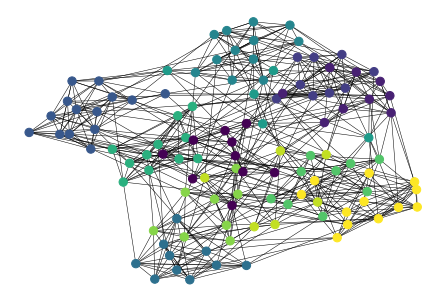

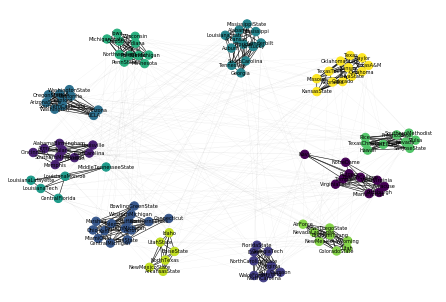

In [6]:
# -*- coding: utf-8 -*-
from algorithm import SpectralClustering
from matplotlib import pyplot as plt
import networkx as nx

filepath = r'./data/football.gml'

# 获取社区划分
G = nx.read_gml(filepath)
k = 12
sc_com = SpectralClustering.partition(G, k)  # 谱聚类
print(sc_com)

# 可视化
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=70, width=0.5, node_color=sc_com)
plt.show()

V = [node for node in G.nodes()]
com_dict = {node:com for node, com in zip(V, sc_com)}
com = [[V[i] for i in range(G.number_of_nodes()) if sc_com[i] == j] for j in range(k)]

# 构造可视化所需要的图
G_graph = nx.Graph()
for each in com:
  G_graph.update(nx.subgraph(G, each))  #
color = [com_dict[node] for node in G_graph.nodes()]

# 可视化
pos = nx.spring_layout(G_graph, seed=4, k=0.33)
nx.draw(G, pos, with_labels=False, node_size=1, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, with_labels=True, node_color=color, node_size=70, width=0.5, font_size=5, font_color='#000000')
plt.show()

In [8]:
# -*- coding: utf-8 -*-
from algorithm import GN
from matplotlib import pyplot as plt
import networkx as nx
import copy

filepath = r'./data/football.gml'

# 获取社区划分
G = nx.read_gml(filepath)
G_copy = copy.deepcopy(G)
gn_com = GN.partition(G_copy)
print(gn_com)

# 可视化
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=70, width=0.5, node_color=gn_com)
plt.show()

V = [node for node in G.nodes()]
com_dict = {node:com for node, com in zip(V, gn_com)}
k = max(com_dict.values()) + 1
com = [[V[i] for i in range(G.number_of_nodes()) if gn_com[i] == j] for j in range(k)]

# 构造可视化所需要的图
G_graph = nx.Graph()
for each in com:
  G_graph.update(nx.subgraph(G, each))  #
color = [com_dict[node] for node in G_graph.nodes()]

# 可视化
pos = nx.spring_layout(G_graph, seed=4, k=0.33)
nx.draw(G, pos, with_labels=False, node_size=1, width=0.1, alpha=0.2)
nx.draw(G_graph, pos, with_labels=True, node_color=color, node_size=70, width=0.5, font_size=5, font_color='#000000')
plt.show()

ModuleNotFoundError: No module named 'community'